<a href="https://colab.research.google.com/github/enyeneraph/ML-pack-capstone-project/blob/main/Bin/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_excel("/content/drive/MyDrive/INT/StageD/capstro/Covid19.xlsx")

In [ ]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [ ]:
print(df.shape)
print('This datasets has', df.shape[0], 'rows and ', df.shape[1],'columns.')

(1925, 231)
This datasets has 1925 rows and  231 columns.


In [ ]:
df.drop(['PATIENT_VISIT_IDENTIFIER'],axis=1,inplace=True)

In [ ]:
df.describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1

In [ ]:
df.isna().sum()

AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
DISEASE GROUPING 2              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 230, dtype: int64

In [ ]:
cols=df.columns
num_cols=df._get_numeric_data().columns
num_cols

Index(['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
       ...
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU'],
      dtype='object', length=228)

In [ ]:
cat_cols=list(set(cols)-set(num_cols))
cat_cols

['WINDOW', 'AGE_PERCENTIL']

In [ ]:
print(df['AGE_PERCENTIL'].unique())
print(df['WINDOW'].unique())

['60th' '90th' '10th' '40th' '70th' '20th' '50th' '80th' '30th'
 'Above 90th']
['0-2' '2-4' '4-6' '6-12' 'ABOVE_12']


In [ ]:
ptile=[]
for j in df['AGE_PERCENTIL']:
  if j== 'Above 90th':
    ptile.append(temp)
  else:
      temp = int(j.replace('th',""))
      ptile.append(temp)

In [ ]:
df['AGE_PERCENTIL']=ptile
df['AGE_PERCENTIL']

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

In [ ]:
window = []
for k in df['WINDOW']:
    if(k == '0-2'):
        window.append(1)
    
    if(k == '2-4'):
        window.append(3)
        
    if(k == '4-6'):
        window.append(5)
        
    if(k == '6-12'):
        window.append(9)
    
    if(k == 'ABOVE_12'):
        window.append(15)
    
df['WINDOW'] = window

In [ ]:
df['WINDOW']

0        1
1        3
2        5
3        9
4       15
        ..
1920     1
1921     3
1922     5
1923     9
1924    15
Name: WINDOW, Length: 1925, dtype: int64

In [ ]:
df.isnull().sum()

AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
DISEASE GROUPING 2              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 230, dtype: int64

In [ ]:
#Filling with Median
for i in cols:
    df[i].fillna(df[i].median(), inplace=True)

In [ ]:
df.shape

(1925, 230)

In [ ]:
df.isnull().sum()

AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
DISEASE GROUPING 2            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 230, dtype: int64

In [ ]:
df.corr()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
AGE_ABOVE65,1.000000e+00,7.820200e-01,4.974367e-02,0.267472,0.067804,0.158191,0.016719,0.305579,-0.015180,0.320144,0.153804,0.073438,-0.103305,-0.103305,-0.103305,-0.103305,NaN,0.071609,0.071609,0.071609,0.071609,NaN,0.098286,0.098286,0.098286,0.098286,NaN,0.019857,0.019857,0.019857,0.019857,NaN,0.026090,0.026090,0.026090,0.026090,NaN,0.032715,0.032715,0.032715,...,0.041841,NaN,-0.151753,0.201905,-0.137292,0.129800,-0.095630,-0.080966,-0.147632,0.197825,-0.137419,0.122236,-0.097602,-0.072979,-0.134556,0.082371,-0.119436,0.038623,-0.094939,-0.092992,-0.028562,0.213650,-0.071320,0.138601,-0.025496,-0.025608,0.074865,0.121813,0.030285,0.095462,0.052760,0.086149,0.094569,0.108719,0.041164,0.090640,0.053683,0.087170,3.139038e-17,0.212198
AGE_PERCENTIL,7.820200e-01,1.000000e+00,2.792880e-02,0.233388,0.106333,0.150409,0.027495,0.276346,-0.028560,0.321648,0.200588,0.076027,-0.098603,-0.098603,-0.098603,-0.098603,NaN,0.063726,0.063726,0.063726,0.063726,NaN,0.121238,0.121238,0.121238,0.121238,NaN,0.033813,0.033813,0.033813,0.033813,NaN,0.037503,0.037503,0.037503,0.037503,NaN,0.044331,0.044331,0.044331,...,0.059461,NaN,-0.131207,0.170955,-0.136115,0.092564,-0.073284,-0.065247,-0.130716,0.166602,-0.134177,0.082678,-0.072018,-0.062582,-0.109138,0.076631,-0.112295,0.024871,-0.082985,-0.065157,-0.029758,0.179601,-0.071549,0.097774,-0.007029,-0.025608,0.058398,0.099534,0.026456,0.072095,0.057899,0.058922,0.074703,0.089324,0.034272,0.069902,0.058505,0.059803,1.669977e-17,0.169763
GENDER,4.974367e-02,2.792880e-02,1.000000e+00,0.039131,-0.032060,-0.073772,-0.054300,-0.021712,-0.016294,-0.028563,-0.006273,0.026432,0.001497,0.001497,0.001497,0.001497,NaN,-0.029648,-0.029648,-0.029648,-0.029648,NaN,-0.015083,-0.015083,-0.015083,-0.015083,NaN,-0.003347,-0.003347,-0.003347,-0.003347,NaN,0.004429,0.004429,0.004429,0.004429,NaN,-0.038883,-0.038883,-0.038883,...,0.014014,NaN,-0.092376,-0.078681,0.008428,-0.068013,-0.081791,0.072878,-0.090561,-0.079860,0.015699,-0.069380,-0.077138,0.078126,-0.061938,-0.048747,0.011748,-0.028813,-0.029594,0.046984,-0.048982,-0.049471,-0.020845,-0.047445,-0.090350,0.076203,0.000424,-0.009089,-0.026489,-0.023981,-0.040538,-0.031321,0.004167,0.000325,-0.033260,-0.022543,-0.040057,-0.031323,-2.099854e-17,-0.065543
DISEASE GROUPING 1,2.674725e-01,2.333879e-01,3.913143e-02,1.000000,0.194220,0.240615,0.010754,0.332901,0.168636,0.416466,0.184245,0.155550,-0.055755,-0.055755,-0.055755,-0.055755,NaN,0.024222,0.024222,0.024222,0.024222,NaN,0.096944,0.096944,0.096944,0.096

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

[]

In [ ]:
#independent and dependent features
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.68%


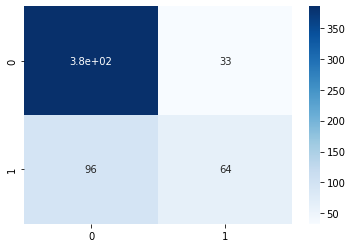

In [ ]:
# Print Confusion Matrix
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred1)) 
sb.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier()
Ext.fit(X_train,y_train)
y_pred2=Ext.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.16%


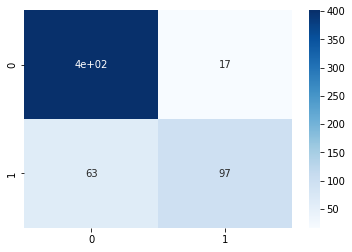

In [ ]:
# Print Confusion Matrix
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2)) 
sb.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
y_pred3=XGB.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 87.72%


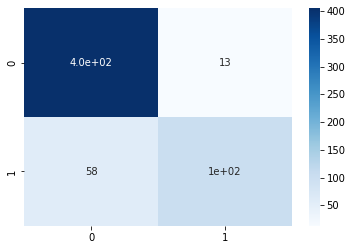

In [ ]:
# Print Confusion Matrix
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred3)) 
sb.heatmap(confusion_matrix, annot=True, cmap="Blues")